In [133]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as smf


In [134]:
df= pd.read_csv('alzheimers_disease_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [135]:
df.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

No hay NAN's

In [136]:
df= df.drop(columns=['PatientID','DoctorInCharge'])
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [137]:
df= pd.get_dummies(df)

In [138]:
df.groupby('Diagnosis').mean()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
Diagnosis,,,,,,,,,,,,,,,,,,,,,
0,74.945284,0.514039,0.708423,1.316055,27.515092,0.290137,10.071880,4.90764,4.974839,7.124832,...,16.265543,5.860669,0.115911,0.096472,5.707951,0.210943,0.164867,0.156228,0.156228,0.301656
1,74.842105,0.492105,0.677632,1.232895,27.912670,0.285526,9.980156,4.94316,5.026581,6.916292,...,11.994657,3.653380,0.376316,0.267105,3.657938,0.194737,0.146053,0.140789,0.163158,0.301316


In [139]:
target = 'Diagnosis'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = linear_model.LogisticRegression().fit(X_train, y_train)

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [140]:
probas = model.predict_proba(X_test)

probabilidades = [i[1] for i in probas]
predicciones = model.predict(X_test)

calibracion = pd.DataFrame({
     'target': y_test,
     'probabilidades': probabilidades,
     'predicciones': predicciones
})

In [141]:
calibracion['bins'] = pd.qcut(calibracion['probabilidades'], q=10, labels=False) + 1
grouped = calibracion.groupby('bins').mean()

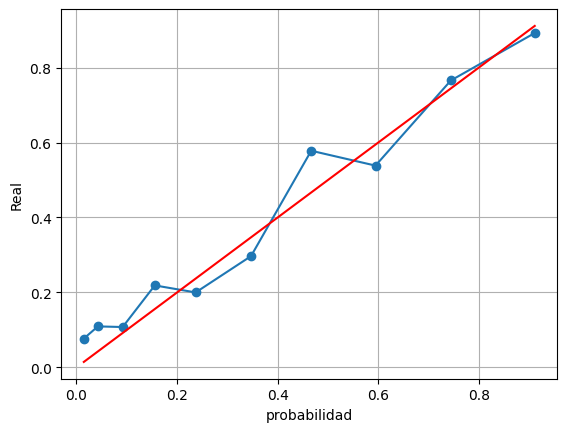

In [142]:
plt.plot(grouped.probabilidades, grouped.target, marker="o")
plt.plot(grouped.probabilidades, grouped.probabilidades, color='r')
plt.xlabel("probabilidad")
plt.ylabel("Real")
plt.grid()

In [143]:
print(np.mean(calibracion.predicciones == calibracion.target))

0.7565891472868217


In [144]:
print(accuracy_score(y_pred=calibracion.predicciones, y_true=calibracion.target))

0.7565891472868217


In [145]:
prob_1 = calibracion.query("target == 1")['probabilidades']
prob_0 = calibracion.query("target == 0")['probabilidades']

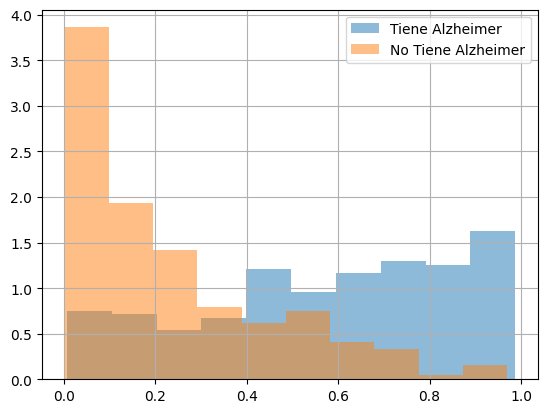

In [146]:
plt.hist(prob_1, alpha = 0.5, density=True, label = 'Tiene Alzheimer')
plt.hist(prob_0, alpha = 0.5, density=True, label = 'No Tiene Alzheimer')
plt.legend()
plt.grid()

In [147]:
# Create the formula for the OLS model
formula = 'Diagnosis ~ ' + ' + '.join(df.columns.difference(['Diagnosis']))

# Fit the OLS model
model = smf.ols(formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Diagnosis   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     51.21
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          2.60e-236
Time:                        10:45:46   Log-Likelihood:                -847.32
No. Observations:                2149   AIC:                             1761.
Df Residuals:                    2116   BIC:                             1948.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [148]:
columns_to_drop = ['CholesterolTotal','CardiovascularDisease', 'CholesterolHDL', 'CholesterolTriglycerides', 'BMI' , 'AlcoholConsumption' ,"Confusion",
    "Depression",
    "Diabetes",
    "DiastolicBP",
    "DietQuality",
    "DifficultyCompletingTasks",
    'EducationLevel',
    'Ethnicity',
    'FunctionalAssessment',
    'Disorientation', 'Forgetfulness'
    ,'FamilyHistoryAlzheimers'
    , 'Gender'
    ,'HeadInjury'
    , 'PhysicalActivity'
    ,'PersonalityChanges'
    , 'SystolicBP','Smoking'
    , 'Age', 'CholesterolLDL'
    , 'Hypertension'
    
    ]

# Check if columns exist in the dataframe before dropping
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

df = df.drop(columns=columns_to_drop)

In [149]:
formula = 'Diagnosis ~ ' + ' + '.join(df.columns.difference(['Diagnosis']))

# Fit the OLS model
model = smf.ols(formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Diagnosis   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     198.7
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          2.74e-174
Time:                        10:45:47   Log-Likelihood:                -1054.2
No. Observations:                2149   AIC:                             2120.
Df Residuals:                    2143   BIC:                             2155.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7708      0

In [150]:
df.keys()

Index(['SleepQuality', 'MMSE', 'MemoryComplaints', 'BehavioralProblems', 'ADL',
       'Diagnosis'],
      dtype='object')

In [151]:
model = smf.logit('Diagnosis ~ SleepQuality + MMSE + MemoryComplaints + BehavioralProblems + ADL', data=df).fit()


Optimization terminated successfully.
         Current function value: 0.465823
         Iterations 6


In [152]:
model.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,1.8602,0.264,7.051,0.000,1.343,2.377
SleepQuality,-0.0643,0.031,-2.053,0.040,-0.126,-0.003
MMSE,-0.0883,0.007,-12.647,0.000,-0.102,-0.075
MemoryComplaints,2.0374,0.139,14.628,0.000,1.764,2.310
BehavioralProblems,1.9569,0.154,12.714,0.000,1.655,2.259
ADL,-0.3414,0.021,-16.060,0.000,-0.383,-0.300


In [154]:
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = linear_model.LogisticRegression().fit(X_train, y_train)

In [155]:
probas = model.predict_proba(X_test)

probabilidades = [i[1] for i in probas]
predicciones = model.predict(X_test)

calibracion = pd.DataFrame({
     'target': y_test,
     'probabilidades': probabilidades,
     'predicciones': predicciones
})

In [156]:
calibracion['bins'] = pd.qcut(calibracion['probabilidades'], q=10, labels=False) + 1
grouped = calibracion.groupby('bins').mean()

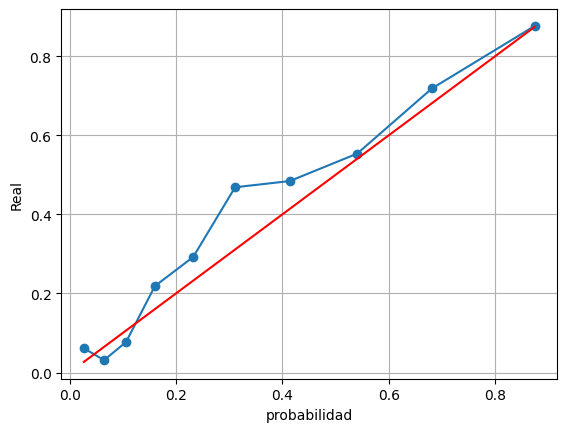

In [157]:
plt.plot(grouped.probabilidades, grouped.target, marker="o")
plt.plot(grouped.probabilidades, grouped.probabilidades, color='r')
plt.xlabel("probabilidad")
plt.ylabel("Real")
plt.grid()